In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [6]:
def get_nifty_volatility(ticker="^NSEI", lookback_days=252):
    """
    Fetch historical NIFTY 50 data and calculate annualized volatility.
    """
    try:
        # Fetch historical NIFTY 50 data
        print("Fetching NIFTY 50 data from Yahoo Finance...")
        data = yf.download(ticker, period="1y", interval="1d")
        
        # Check if data is empty
        if data.empty:
            print("Error: No data fetched. Check ticker symbol or network connection.")
            return None, None

        # Calculate log returns
        data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))
        
        # Calculate annualized volatility
        volatility = np.std(data['Log Returns'].dropna()) * np.sqrt(252)
        
        print(f"Data fetched successfully! {len(data)} trading days loaded.")
        print(f"Annualized Volatility: {volatility:.4f}")
        
        return data, volatility
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

In [7]:
def display_nifty_analysis(data, volatility):
    """
    Display NIFTY 50 price trend and log returns with volatility.
    """
    # Plot NIFTY 50 Closing Price and Log Returns
    plt.figure(figsize=(12, 6))
    
    # Closing Price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], color='blue', label='NIFTY 50 Close Price')
    plt.title("NIFTY 50 Closing Price (Past Year)")
    plt.ylabel("Price")
    plt.grid()
    
    # Log Returns
    plt.subplot(2, 1, 2)
    plt.plot(data['Log Returns'], color='orange', label='Log Returns')
    plt.title(f"NIFTY 50 Log Returns (Annualized Volatility = {volatility:.2%})")
    plt.ylabel("Log Returns")
    plt.grid()
    
    plt.tight_layout()
    plt.show()

In [8]:
# Main Execution
def main():
    # Parameters
    nifty_ticker = "^NSEI"  # NIFTY 50 ticker symbol on Yahoo Finance
    risk_free_rate = 0.07   # Assume 7% annualized risk-free rate for India
    
    # Fetch NIFTY 50 data and calculate volatility
    nifty_data, volatility = get_nifty_volatility(ticker=nifty_ticker)
    
    # Check if data was fetched successfully
    if nifty_data is None or volatility is None:
        print("Failed to retrieve NIFTY 50 data. Exiting analysis.")
        return
    
    # Display data and analysis
    print(f"Latest NIFTY 50 Close Price: {nifty_data['Close'].iloc[-1]:.2f}")
    print(f"Assumed Risk-Free Interest Rate: {risk_free_rate * 100:.2f}% per year")
    display_nifty_analysis(nifty_data, volatility)



Fetching NIFTY 50 data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Data fetched successfully! 246 trading days loaded.
Annualized Volatility: 0.1408
Latest NIFTY 50 Close Price: 24336.00
Assumed Risk-Free Interest Rate: 7.00% per year


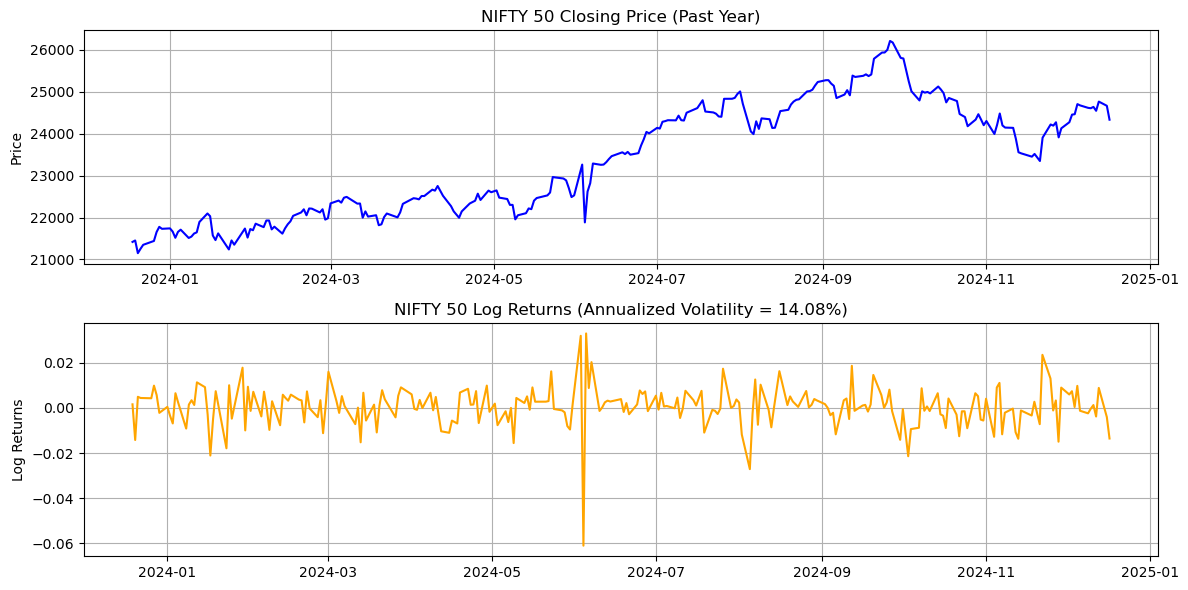

In [9]:
if __name__ == "__main__":
    main()

In [12]:
from scipy.stats import norm

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')




OSError: 'seaborn-v0_8-darkgrid' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [13]:
# Function to fetch NIFTY 50 data and calculate annualized volatility
def get_nifty_volatility(ticker="^NSEI", lookback_days=252):
    """
    Fetch historical NIFTY 50 data and calculate annualized volatility.
    """
    try:
        # Fetch historical NIFTY 50 data
        print("Fetching NIFTY 50 data from Yahoo Finance...")
        data = yf.download(ticker, period="1y", interval="1d")

        # Check if data is empty
        if data.empty:
            print("Error: No data fetched. Check ticker symbol or network connection.")
            return None, None

        # Calculate log returns
        data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))

        # Calculate annualized volatility
        volatility = np.std(data['Log Returns'].dropna()) * np.sqrt(252)

        print(f"Data fetched successfully! {len(data)} trading days loaded.")
        print(f"Annualized Volatility: {volatility:.4f}")

        return data, volatility

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

# Fetch NIFTY 50 data and calculate volatility
nifty_ticker = "^NSEI"  # Yahoo Finance ticker for NIFTY 50 index
nifty_data, volatility = get_nifty_volatility(ticker=nifty_ticker)

# Display the first 5 rows of data
if nifty_data is not None:
    display(nifty_data.head())


Fetching NIFTY 50 data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed

Data fetched successfully! 246 trading days loaded.
Annualized Volatility: 0.1408


,Open,High,Low,Close,Adj Close,Volume,Log Returns
Date,,,,,,,
2023-12-18,21434.800781,21482.800781,21365.349609,21418.650391,21418.650391,249700,NaN
2023-12-19,21477.650391,21505.050781,21337.750000,21453.099609,21453.099609,249800,0.001607
2023-12-20,21543.500000,21593.000000,21087.349609,21150.150391,21150.150391,363900,-0.014222
2023-12-21,21033.949219,21288.349609,20976.800781,21255.050781,21255.050781,277500,0.004948
2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,21349.400391,284700,0.004429


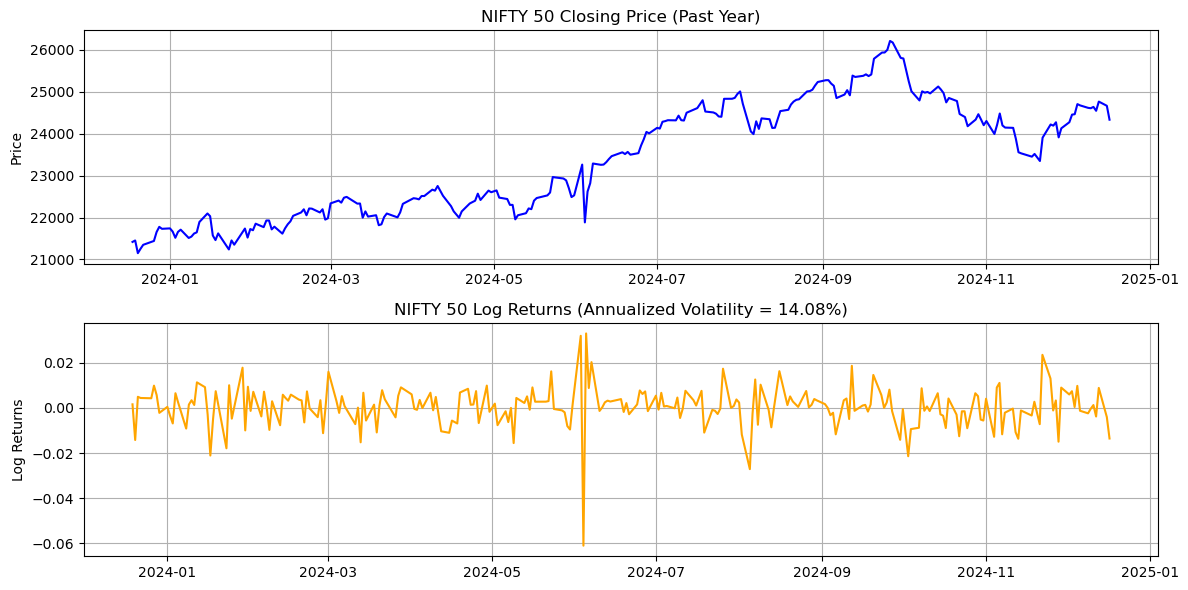

In [14]:
# Function to visualize NIFTY 50 price trend and log returns
def display_nifty_analysis(data, volatility):
    """
    Display NIFTY 50 price trend and log returns with volatility.
    """
    # Plot NIFTY 50 Closing Price and Log Returns
    plt.figure(figsize=(12, 6))

    # Closing Price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], color='blue', label='NIFTY 50 Close Price')
    plt.title("NIFTY 50 Closing Price (Past Year)")
    plt.ylabel("Price")
    plt.grid()

    # Log Returns
    plt.subplot(2, 1, 2)
    plt.plot(data['Log Returns'], color='orange', label='Log Returns')
    plt.title(f"NIFTY 50 Log Returns (Annualized Volatility = {volatility:.2%})")
    plt.ylabel("Log Returns")
    plt.grid()

    plt.tight_layout()
    plt.show()

# Plot NIFTY 50 data and log returns
if nifty_data is not None:
    display_nifty_analysis(nifty_data, volatility)


In [15]:
# Define option pricing parameters
S0 = nifty_data['Close'].iloc[-1]  # Current NIFTY 50 price
r = 0.07  # Risk-free rate (7% annualized)
T_list = [1/12, 0.25, 0.5, 1]  # Time to maturity: 1 month, 3 months, 6 months, 1 year
K_list = [S0 * 0.95, S0, S0 * 1.05]  # Strike prices: ITM, ATM, OTM

# Display parameters
print(f"Current NIFTY 50 Price (S0): {S0:.2f}")
print(f"Risk-Free Rate (r): {r * 100:.2f}% per year")
print("Time to Maturity (T in years):", T_list)
print("Strike Prices (K):", K_list)


Current NIFTY 50 Price (S0): 24336.00
Risk-Free Rate (r): 7.00% per year
Time to Maturity (T in years): [0.08333333333333333, 0.25, 0.5, 1]
Strike Prices (K): [23119.2, 24336.0, 25552.8]


In [16]:
# Black-Scholes Model for European Call Option
def black_scholes_call(S0, K, T, r, sigma):
    """
    Calculate the price of a European Call Option using the Black-Scholes model.
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


In [17]:
# Calculate option prices using Black-Scholes model
results = []

for T in T_list:
    for K in K_list:
        call_price = black_scholes_call(S0, K, T, r, volatility)
        results.append([T, K, call_price])

# Display results as a DataFrame
results_df = pd.DataFrame(results, columns=["Time to Maturity", "Strike Price", "Black-Scholes Call Price"])
print("European Call Option Prices (Black-Scholes):")
display(results_df)


European Call Option Prices (Black-Scholes):


,Time to Maturity,Strike Price,Black-Scholes Call Price
0,0.083333,23119.2,1386.123169
1,0.083333,24336.0,468.347847
2,0.083333,25552.8,75.514752
3,0.250000,23119.2,1761.920047
4,0.250000,24336.0,909.476897
5,0.250000,25552.8,375.026654
6,0.500000,23119.2,2259.549683
7,0.500000,24336.0,1426.333229
8,0.500000,25552.8,813.485460
9,1.000000,23119.2,3126.890207


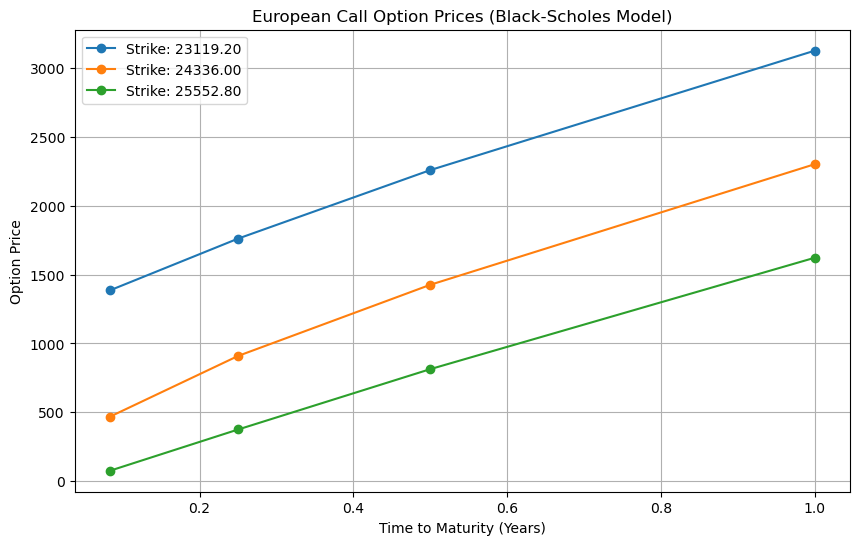

In [18]:
# Plot Call Option Prices for different strike prices and maturities
plt.figure(figsize=(10, 6))

for K in K_list:
    subset = results_df[results_df['Strike Price'] == K]
    plt.plot(subset['Time to Maturity'], subset['Black-Scholes Call Price'], marker='o', label=f"Strike: {K:.2f}")

plt.title("European Call Option Prices (Black-Scholes Model)")
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Option Price")
plt.legend()
plt.grid()
plt.show()
